Test R notebook

Validate assumptions for mixed-effects model with [this](https://ademos.people.uic.edu/Chapter18.html).


- try things with python first and then verify with R?

In [14]:
library(lme4)
library(AER)
library(dplyr)
library(purrr)
library(magrittr)
library(ggplot2)

data <- read.csv("../../data/processed/60b37265a9f60881975de69e-reshare_rates.csv")
head(data)

,user_id,consent,timeSubmitted,educationLevel,politicalAffiliation,attendsProtests,age,gender_man,gender_nonBinary,gender_woman,⋯,socialMedias_snapchat,socialMedias_tiktok,socialMedias_twitter,condition,evidence,Affirms,Denies,Neutral,Questions,rumour_proportion
,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.177459e+18,1,2021-06-04 13:46:42.938000+00:00,undergrad,left,False,25,1,0,0,⋯,1,1,0,Control,High,0.2,0.0,0.00,0.00,1.00
2,-1.177459e+18,1,2021-06-04 13:46:42.938000+00:00,undergrad,left,False,25,1,0,0,⋯,1,1,0,Control,Low,0.2,0.2,0.50,0.00,0.50
3,-1.783294e+18,1,2021-06-03 16:50:49.091000+00:00,graduateSchool,left,0,26,1,0,0,⋯,0,0,0,Treatment,High,0.1,0.0,0.00,0.25,1.00
4,-1.783294e+18,1,2021-06-03 16:50:49.091000+00:00,graduateSchool,left,0,26,1,0,0,⋯,0,0,0,Treatment,Low,0.1,0.3,0.50,0.00,0.25
5,-1.815566e+18,1,2021-06-03 17:03:30.048000+00:00,graduateSchool,centreLeft,False,47,0,0,1,⋯,0,0,0,Control,High,0.0,0.5,0.25,0.50,0.00
6,-1.815566e+18,1,2021-06-03 17:03:30.048000+00:00,graduateSchool,centreLeft,False,47,0,0,1,⋯,0,0,0,Control,Low,0.0,0.4,0.50,0.25,0.00


## H1 and H3

In [2]:
md.affirms <- lmer(Affirms ~ condition * evidence + (1 | user_id), data = data)
summary(md.affirms)

Linear mixed model fit by REML ['lmerMod']
Formula: Affirms ~ condition * evidence + (1 | user_id)
   Data: data

REML criterion at convergence: -126

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.7658 -0.5485 -0.1249  0.3175  2.2637 

Random effects:
 Groups   Name        Variance Std.Dev.
 user_id  (Intercept) 0.01509  0.1228  
 Residual             0.01334  0.1155  
Number of obs: 165, groups:  user_id, 89

Fixed effects:
                                 Estimate Std. Error t value
(Intercept)                     0.1714133  0.0247775   6.918
conditionTreatment             -0.0007122  0.0376823  -0.019
evidenceLow                    -0.0365357  0.0242513  -1.507
conditionTreatment:evidenceLow -0.0309557  0.0371741  -0.833

Correlation of Fixed Effects:
            (Intr) cndtnT evdncL
cndtnTrtmnt -0.658              
evidenceLow -0.520  0.342       
cndtnTrtm:L  0.339 -0.524 -0.652

**Satterthwaite approximation for p-values**

In [3]:
coefs <- data.frame(coef(summary(md.affirms)))
# get Satterthwaite-approximated degrees of freedom
coefs$df.Satt <- coef(summary(md.affirms))
# get approximate p-values
coefs$p.Satt <- coef(summary(md.affirms))[, 2]
coefs

,Estimate,Std..Error,t.value,df.Satt,p.Satt
,<dbl>,<dbl>,<dbl>,"<dbl[,3]>",<dbl>
(Intercept),0.1714132737,0.02477749,6.91810519,"0.1714132737, 0.02477749, 6.91810519",0.02477749
conditionTreatment,-0.0007122212,0.03768234,-0.01890066,"-0.0007122212, 0.03768234, -0.01890066",0.03768234
evidenceLow,-0.0365357496,0.02425126,-1.50655067,"-0.0365357496, 0.02425126, -1.50655067",0.02425126
conditionTreatment:evidenceLow,-0.0309557467,0.03717413,-0.83272273,"-0.0309557467, 0.03717413, -0.83272273",0.03717413


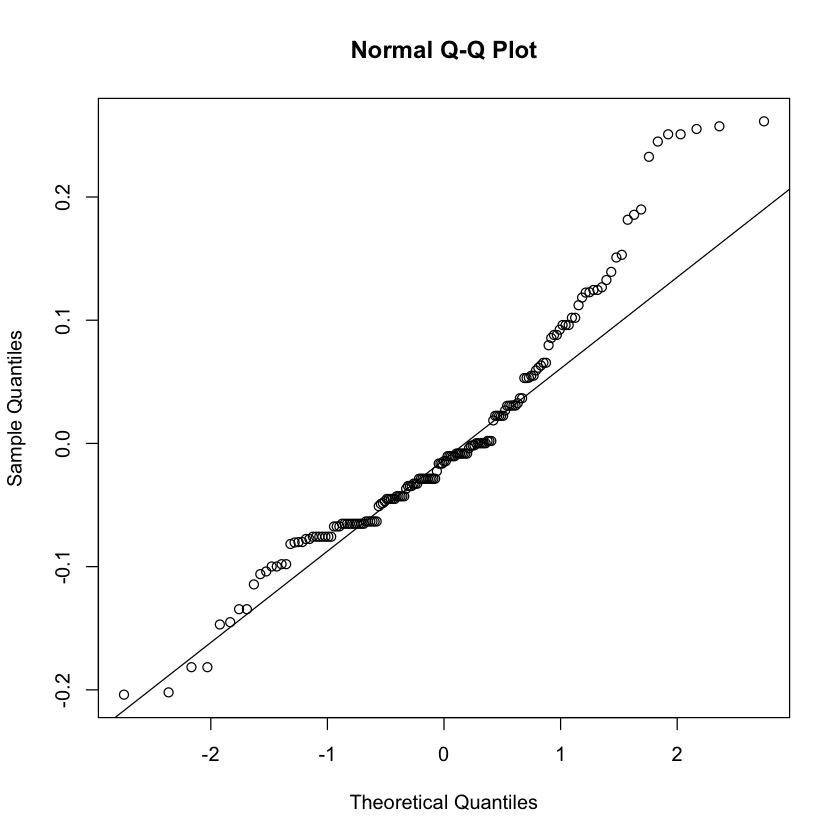

In [4]:
qqnorm(resid(md.affirms))
qqline(resid(md.affirms))  # points fall nicely onto the line - good!

lattice theme set by effectsTheme()
See ?effectsTheme for details.



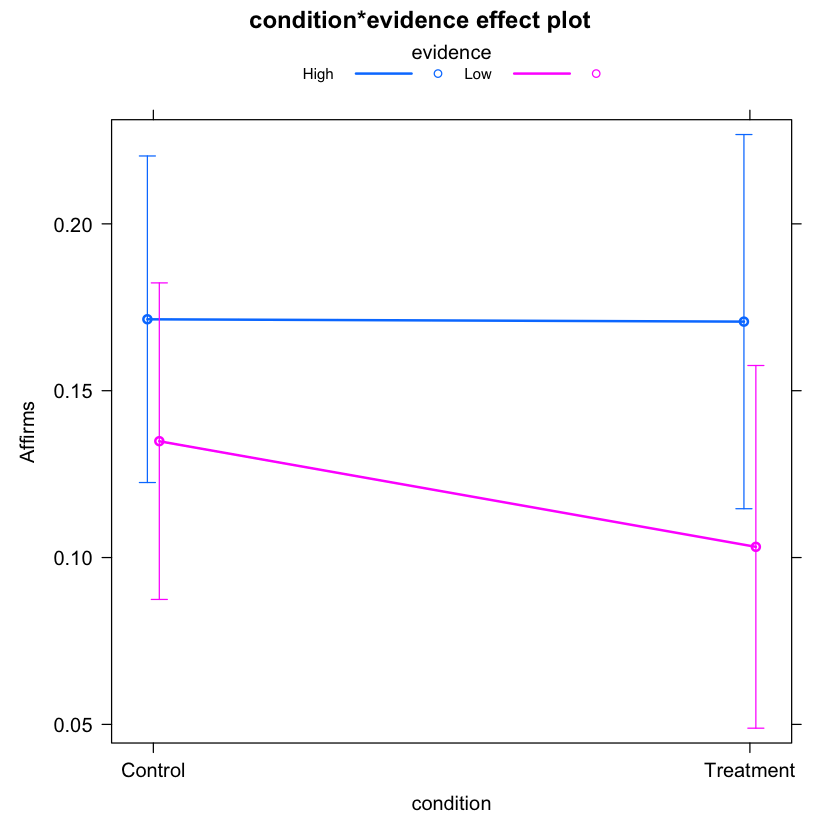

In [5]:
library(effects)
plot(allEffects(md.affirms), multiline=TRUE, ci.style="bars")

## H2 and H4

In [6]:
md.denies <- lmer(Denies ~ condition * evidence + (1 | user_id), data = data)
summary(md.denies)

boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML ['lmerMod']
Formula: Denies ~ condition * evidence + (1 | user_id)
   Data: data

REML criterion at convergence: -74.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8856 -0.5771 -0.2504  0.2946  3.5650 

Random effects:
 Groups   Name        Variance  Std.Dev. 
 user_id  (Intercept) 1.764e-19 4.200e-10
 Residual             3.366e-02 1.835e-01
Number of obs: 165, groups:  user_id, 89

Fixed effects:
                               Estimate Std. Error t value
(Intercept)                     0.08000    0.02735   2.925
conditionTreatment              0.02588    0.04169   0.621
evidenceLow                     0.18122    0.03788   4.784
conditionTreatment:evidenceLow  0.05884    0.05775   1.019

Correlation of Fixed Effects:
            (Intr) cndtnT evdncL
cndtnTrtmnt -0.656              
evidenceLow -0.722  0.474       
cndtnTrtm:L  0.474 -0.722 -0.656
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see ?isSingular


**Satterthwaite approximation for p-values**

In [7]:
coefs <- data.frame(coef(summary(md.denies)))
# get Satterthwaite-approximated degrees of freedom
coefs$df.Satt <- coef(summary(md.denies))
# get approximate p-values
coefs$p.Satt <- coef(summary(md.denies))[, 2]
coefs

,Estimate,Std..Error,t.value,df.Satt,p.Satt
,<dbl>,<dbl>,<dbl>,"<dbl[,3]>",<dbl>
(Intercept),0.08000000,0.02734904,2.9251485,"0.08000000, 0.02734904, 2.9251485",0.02734904
conditionTreatment,0.02588235,0.04168849,0.6208513,"0.02588235, 0.04168849, 0.6208513",0.04168849
evidenceLow,0.18122449,0.03787982,4.7841957,"0.18122449, 0.03787982, 4.7841957",0.03787982
conditionTreatment:evidenceLow,0.05883910,0.05774543,1.0189396,"0.05883910, 0.05774543, 1.0189396",0.05774543


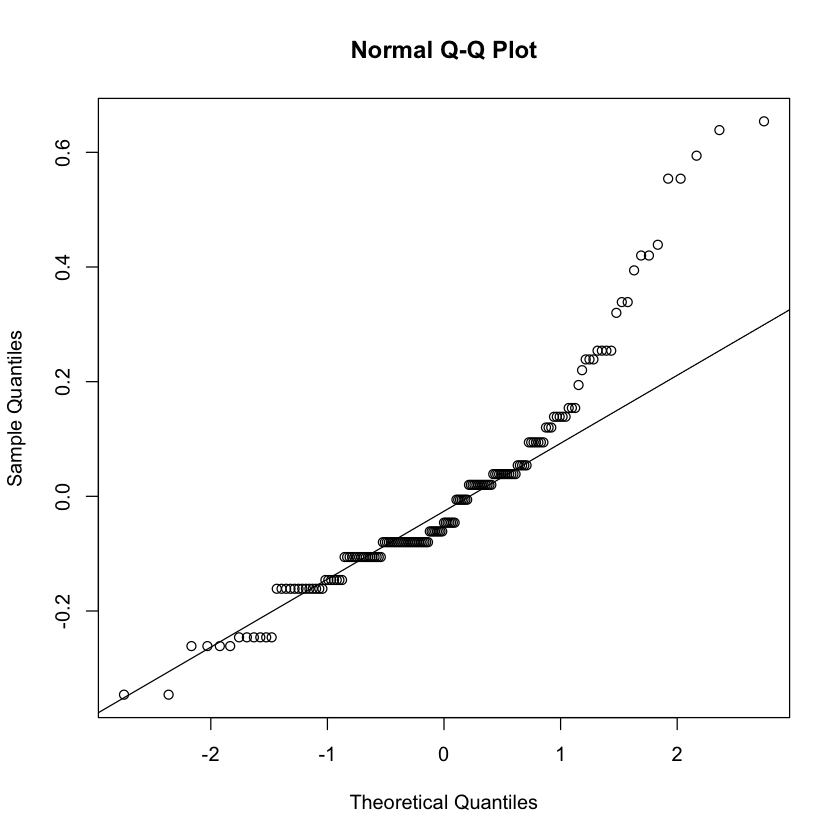

In [8]:
qqnorm(resid(md.denies))
qqline(resid(md.denies))  # points fall nicely onto the line - good!

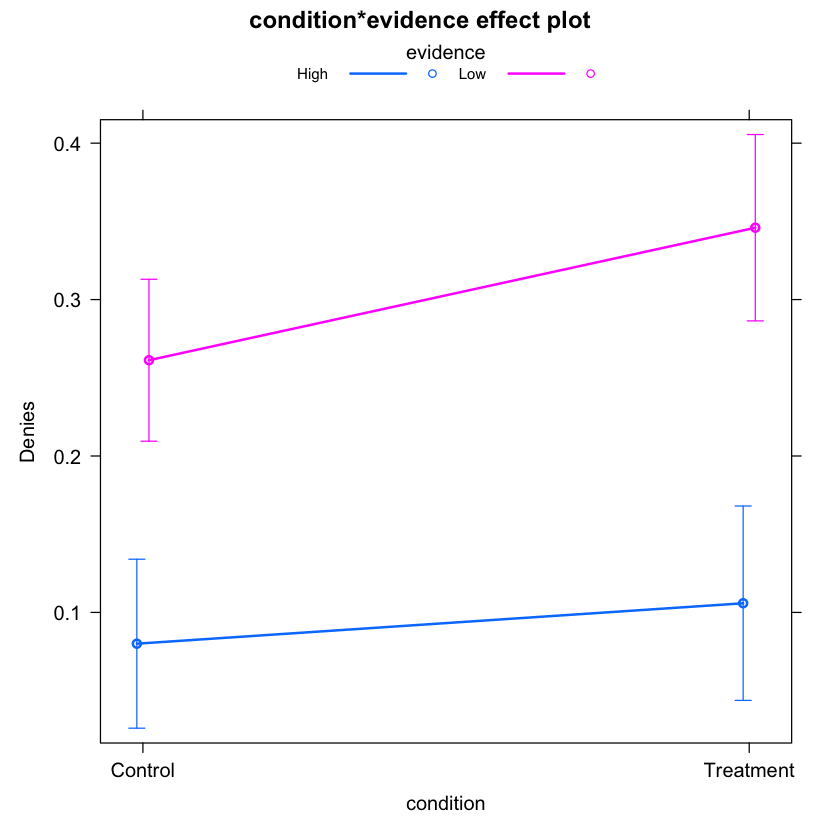

In [9]:
library(effects)
plot(allEffects(md.denies), multiline=TRUE, ci.style="bars")

### OTHER

Regress on rumour prop (affirmations / affirmations + denials)

In [10]:
md.rumour_prop <- lmer(rumour_proportion ~ condition * evidence + (1 | user_id), data = data)
summary(md.rumour_prop)

Linear mixed model fit by REML ['lmerMod']
Formula: rumour_proportion ~ condition * evidence + (1 | user_id)
   Data: data

REML criterion at convergence: 123.7

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.88025 -0.66278 -0.03301  0.81851  2.10515 

Random effects:
 Groups   Name        Variance Std.Dev.
 user_id  (Intercept) 0.01796  0.1340  
 Residual             0.10440  0.3231  
Number of obs: 154, groups:  user_id, 88

Fixed effects:
                               Estimate Std. Error t value
(Intercept)                     0.66722    0.05736  11.633
conditionTreatment             -0.05621    0.08426  -0.667
evidenceLow                    -0.36814    0.07148  -5.150
conditionTreatment:evidenceLow -0.04009    0.10636  -0.377

Correlation of Fixed Effects:
            (Intr) cndtnT evdncL
cndtnTrtmnt -0.681              
evidenceLow -0.714  0.486       
cndtnTrtm:L  0.480 -0.701 -0.672

**Satterthwaite approximation for p-values**

In [11]:
coefs <- data.frame(coef(summary(md.rumour_prop)))
# get Satterthwaite-approximated degrees of freedom
coefs$df.Satt <- coef(summary(md.rumour_prop))
# get approximate p-values
coefs$p.Satt <- coef(summary(md.rumour_prop))[, 2]
coefs

,Estimate,Std..Error,t.value,df.Satt,p.Satt
,<dbl>,<dbl>,<dbl>,"<dbl[,3]>",<dbl>
(Intercept),0.66722237,0.05735680,11.6328388,"0.66722237, 0.05735680, 11.6328388",0.05735680
conditionTreatment,-0.05620715,0.08425593,-0.6671002,"-0.05620715, 0.08425593, -0.6671002",0.08425593
evidenceLow,-0.36813813,0.07148258,-5.1500399,"-0.36813813, 0.07148258, -5.1500399",0.07148258
conditionTreatment:evidenceLow,-0.04009296,0.10635891,-0.3769591,"-0.04009296, 0.10635891, -0.3769591",0.10635891


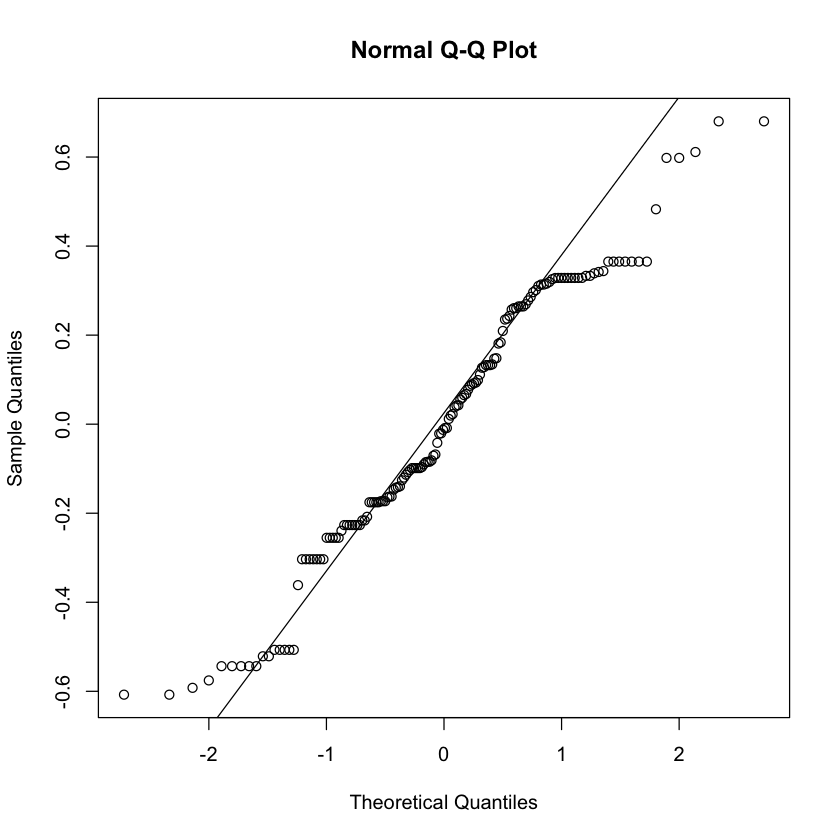

In [12]:
qqnorm(resid(md.rumour_prop))
qqline(resid(md.rumour_prop))  # points fall nicely onto the line - good!

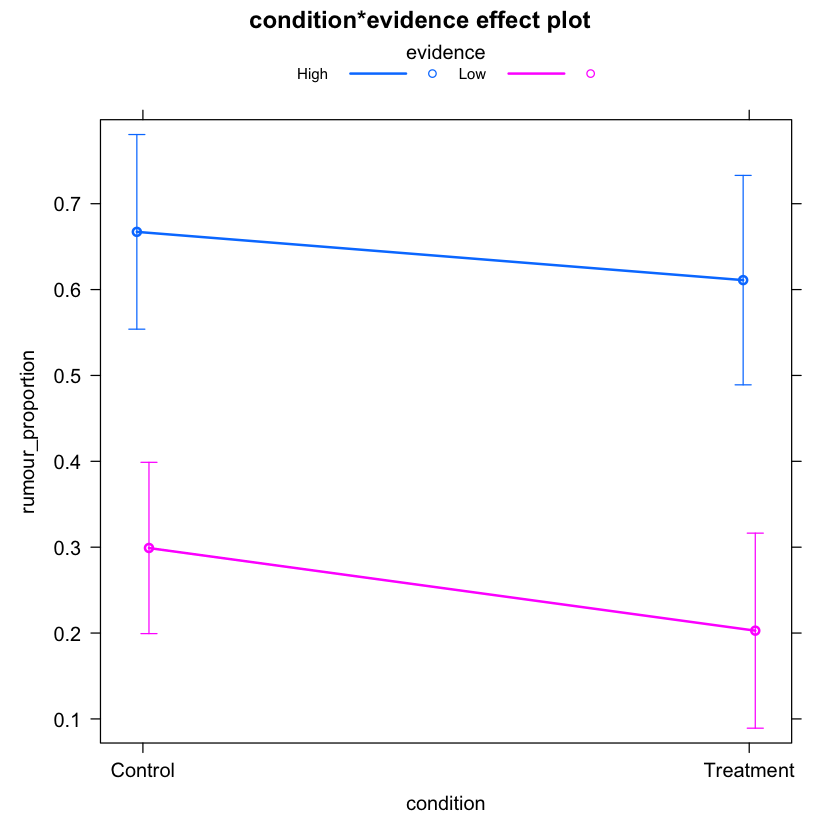

In [13]:
library(effects)
plot(allEffects(md.rumour_prop), multiline=TRUE, ci.style="bars")